In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numba
from scipy import integrate
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error as MSE
# %matplotlib notebook

In [ ]:
N = 13030
S0, E10, E20 ,I10, I20, R0 = 10000,300 ,700, 0.0, 0.0, 0.0
D = 9.0 # infections lasts four days
beta1 = 0.1e-4  # infected person infects 1 other person per day
beta2 = 0.3e-4
gamma1 = 1.0 / D
gamma2 = 1.0 / D
sigma = 0.5
mu1 = (1/5)*1e-4
mu2 = (1/5)*1e-4
b1 = 1/10e4
b2 =  1/10e4
b_prime = 1/10e4
lambd = 1/10e4
delta = 2*1/10e4


In [ ]:
def SEIR(x, t):
    S, E1, E2, I1, I2, R = x
    dS= lambd - beta1 * S * I1 - beta2 * S * I2 - (delta - b_prime) * S
    dE1 = beta1 * S * I1 - (gamma1 + delta - b1) *E1
    dE2 = beta2 * S * I2 - (gamma2 + delta - b2)*E2
    dI1 = gamma1 * E1 - (mu1 + delta - b1)*  I1
    dI2 = gamma2 * E2 - (mu2 + delta - b2) * I2
    dR  = mu1 * I1 + mu2 * I2 - (delta - b_prime) * R

    dxdt = np.array([dS, dE1, dE2, dI1, dI2, dR])
    return dxdt

In [ ]:
X0 = [S0, E10, E20 ,I10, I20, R0]
tmax = 100 #A grid of time points (in days)
Nt = 10000
t = np.linspace(0, tmax, Nt+1)
print(t)

[0.000e+00 1.000e-02 2.000e-02 ... 9.998e+01 9.999e+01 1.000e+02]


In [ ]:
def Euler(func, X0, t):
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        X[i+1] = X[i] + func(X[i], t[i]) * dt
    return X

In [ ]:
# Nt = 10000
Xe = Euler(SEIR, X0, t)
print(Xe)

[[1.00000000e+04 3.00000000e+02 7.00000000e+02 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.99999900e+03 2.99666637e+02 6.99222152e+02 3.33333333e-01
  7.77777778e-01 0.00000000e+00]
 [9.99999533e+03 2.99333977e+02 6.98447502e+02 6.66296163e-01
  1.55469105e+00 2.22222222e-07]
 ...
 [3.42605063e-05 1.13979299e-01 2.42846879e+00 9.04551465e+02
  1.00661347e+04 1.57800464e+01]
 [3.42539425e-05 1.13852647e-01 2.42577035e+00 9.04551321e+02
  1.00661344e+04 1.57822390e+01]
 [3.42473992e-05 1.13726136e-01 2.42307491e+00 9.04551176e+02
  1.00661341e+04 1.57844315e+01]]


In [ ]:
print(len(Xe))

10001


[1.00000000e+04 9.99999900e+03 9.99999533e+03 ... 3.42605063e-05
 3.42539425e-05 3.42473992e-05]


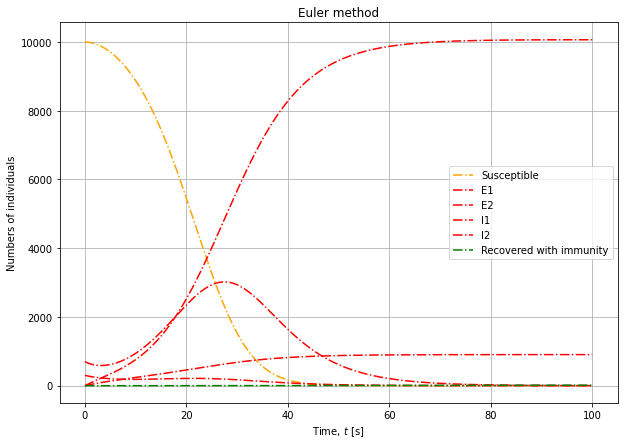

In [ ]:
print(Xe[:,0])
plt.figure(figsize=(10, 7))

plt.title("Euler method")
plt.plot(t, Xe[:,0], color = 'orange', linestyle = '-.', label='Susceptible')

plt.plot(t, Xe[:,1], 'r-.', label='E1')
plt.plot(t, Xe[:,2], 'r-.', label='E2')
plt.plot(t, Xe[:,3], 'r-.', label='I1')
plt.plot(t, Xe[:,4], 'r-.', label='I2')
plt.plot(t, Xe[:,5], 'g-.', label='Recovered with immunity')
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Numbers of individuals")
plt.legend(loc = "best")

plt.show();

In [ ]:
# Preprocessing : y_train values must be between 0 and 1 for the training of the model
X_train = t
y_train = Xe/N

In [ ]:
#Create Neural Network with keras
SEIR = Sequential()
# Input layer :
SEIR.add(Dense(units=1, input_dim=1))

In [ ]:
#Hidden layers :
SEIR.add(Dense(units=15, activation='sigmoid'))
SEIR.add(Dense(units=15, activation='sigmoid'))
SEIR.add(Dense(units=15, activation='sigmoid'))
SEIR.add(Dense(units=15, activation='sigmoid'))
SEIR.add(Dense(units=15, activation='sigmoid'))
SEIR.add(Dense(units=15, activation='sigmoid'))

In [ ]:
# Output layer :
SEIR.add(Dense(units=6))

Adam = tf.keras.optimizers.Adam(learning_rate=0.0001,
                                beta_1=0.9, beta_2=0.999,
                                epsilon=1e-10,
                                amsgrad=False)
SEIR.compile(optimizer = Adam,
                       loss = 'mean_squared_error',
                       metrics=['accuracy'])

history = SEIR.fit(X_train, y_train, epochs=2000, verbose=True)


Epoch 1/2000
313/313 [==============================] - 4s 3ms/step - loss: 0.1436 - accuracy: 1.0000
Epoch 2/2000
313/313 [==============================] - 1s 3ms/step - loss: 0.0279 - accuracy: 1.0000
Epoch 3/2000
313/313 [==============================] - 1s 3ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 4/2000
313/313 [==============================] - 1s 3ms/step - loss: 1.9682e-04 - accuracy: 1.0000
Epoch 5/2000
313/313 [==============================] - 1s 3ms/step - loss: 5.3844e-06 - accuracy: 1.0000
Epoch 6/2000
313/313 [==============================] - 1s 3ms/step - loss: 6.5411e-08 - accuracy: 1.0000
Epoch 7/2000
313/313 [==============================] - 1s 3ms/step - loss: 5.4338e-09 - accuracy: 1.0000
Epoch 8/2000
313/313 [==============================] - 1s 3ms/step - loss: 5.1788e-09 - accuracy: 1.0000
Epoch 9/2000
313/313 [==============================] - 1s 3ms/step - loss: 5.1571e-09 - accuracy: 1.0000
Epoch 10/2000
313/313 [==============================] - 1

In [ ]:
# Save the trained model
SEIR.save("SEIR_R_sup_1_4HL_15n_2000epochs_Sigmoid.h5")

#load the model :
new_model = tf.keras.models.load_model('SEIR_R_sup_1_4HL_15n_2000epochs_Sigmoid.h5')

new_model.summary()

X_test1 = np.linspace(0, tmax, Nt+1)
y_p1 = N*new_model(X_test1)  # y_p1 = y_predicted 1
#Calcule de MSE : #
z = (Xe[:,0])*(Xe[:,0])
from math import sqrt
norme_y_true = sqrt(sum(z))
print(1/norme_y_true)
print(len(Xe[:,0]))
print(len(y_p1[:,0]))
#The MSE :
err_S = (1/norme_y_true)*MSE(Xe[:,0], y_p1[:,0])
print("The predicted erreur of S equal to", err_S)
err_E1 = (1/norme_y_true)*MSE(Xe[:,1], y_p1[:,1])
print("The predicted erreur of I1 equal to", err_E1)
err_E2 = (1/norme_y_true)*MSE(Xe[:,2], y_p1[:,2])
print("The predicted erreur of I2 equal to", err_E2)
err_I1 = (1/norme_y_true)*MSE(Xe[:,3], y_p1[:,3])
print("The predicted erreur of E1 equal to", err_I1)
err_I2 = (1/norme_y_true)*MSE(Xe[:,4], y_p1[:,4])
print("The predicted erreur of E2 equal to", err_I2)
err_R = (1/norme_y_true)*MSE(Xe[:,5], y_p1[:,5])
print("The predicted erreur of R equal to", err_R)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 15)                30        
                                                                 
 dense_2 (Dense)             (None, 15)                240       
                                                                 
 dense_3 (Dense)             (None, 15)                240       
                                                                 
 dense_4 (Dense)             (None, 15)                240       
                                                                 
 dense_5 (Dense)             (None, 15)                240       
                                                                 
 dense_6 (Dense)             (None, 15)                2

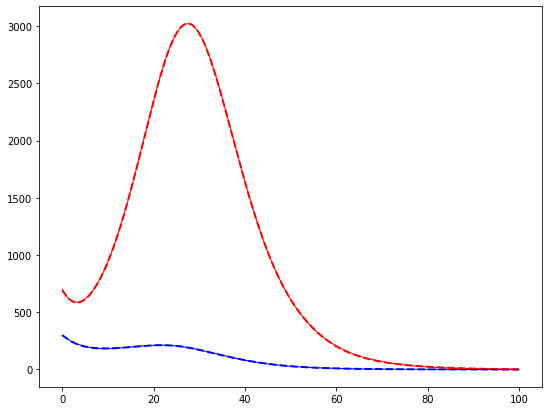

In [ ]:
plt.figure(figsize=(9, 7))
plt.plot(X_test1, y_p1[:,1], 'b--' , linewidth=2, label = 'E1(t) Neural Network Solution')
plt.plot(X_test1, y_p1[:,2], 'r--', linewidth=2, label = 'E2(t) Neural Network Solution')
plt.plot(X_test1, Xe[:,1], 'b-', linewidth=1, label = 'E1(t) Euler solution')
plt.plot(X_test1, Xe[:,2], 'r-', linewidth=1, label = 'E2(t) Euler solution')
